In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [97]:
df = pd.read_csv('udemy_courses_v3.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2760 non-null   object 
 1   Lecturer        2630 non-null   object 
 2   Rating          2613 non-null   float64
 3   Reviews         2613 non-null   object 
 4   Hours           2760 non-null   float64
 5   Lectures        2760 non-null   int64  
 6   Level           2760 non-null   object 
 7   Base Price      0 non-null      float64
 8   Original Price  2394 non-null   object 
 9   Discount Price  2394 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 215.8+ KB


In [99]:
df.drop('Base Price', axis=1, inplace=True)

In [100]:
for col in df.columns:
    print(col, df[col].nunique())

Name 2376
Lecturer 1219
Rating 30
Reviews 869
Hours 121
Lectures 313
Level 4
Original Price 29
Discount Price 23


In [101]:
df.isnull().sum()

Name                0
Lecturer          130
Rating            147
Reviews           147
Hours               0
Lectures            0
Level               0
Original Price    366
Discount Price    366
dtype: int64

In [102]:
for col in df.columns:
    print(col, df[col].duplicated().sum())

Name 384
Lecturer 1540
Rating 2729
Reviews 1890
Hours 2639
Lectures 2447
Level 2756
Original Price 2730
Discount Price 2736


In [103]:
df.drop_duplicates(subset='Name', keep='first', inplace=True)

In [104]:
df.isna().sum()

Name                0
Lecturer            0
Rating             17
Reviews            17
Hours               0
Lectures            0
Level               0
Original Price    223
Discount Price    223
dtype: int64

In [105]:
df.isna().sum() / len(df) * 100

Name              0.000000
Lecturer          0.000000
Rating            0.715488
Reviews           0.715488
Hours             0.000000
Lectures          0.000000
Level             0.000000
Original Price    9.385522
Discount Price    9.385522
dtype: float64

## Price and Original Price columns

In [106]:
df['Original Price'].value_counts()

E£399.99      1380
Free           171
E£799.99        98
E£899.99        68
E£999.99        66
E£1,099.99      64
E£699.99        56
E£1,399.99      28
E£649.99        26
E£599.99        25
E£499.99        22
E£449.99        21
E£1,199.99      19
E£549.99        18
E£1,299.99      15
E£1,699.99      10
E£1,499.99       9
E£1,599.99       9
E£3,099.99       7
E£2,299.99       7
E£2,499.99       5
E£2,399.99       5
E£2,199.99       5
E£2,599.99       4
E£2,099.99       4
E£1,799.99       4
E£1,999.99       3
E£2,799.99       2
E£1,899.99       2
Name: Original Price, dtype: int64

In [107]:
def manipulate_price(col, data):
   data[col] = data[col].apply(lambda x: float(x.replace('Free', '0').replace('£', '').replace(',', '').replace('E', '')) if not pd.isna(x)  else x)
   data[col] = data[col].apply(lambda x: x if pd.isna(x) or not x else x + 0.01)
   return data

In [108]:
df = manipulate_price('Original Price', df)

In [109]:
df = manipulate_price('Discount Price', df)

In [110]:
df['Original Price'].value_counts(dropna=False)

400.0     1380
NaN        223
0.0        171
800.0       98
900.0       68
1000.0      66
1100.0      64
700.0       56
1400.0      28
650.0       26
600.0       25
500.0       22
450.0       21
1200.0      19
550.0       18
1300.0      15
1700.0      10
1500.0       9
1600.0       9
3100.0       7
2300.0       7
2500.0       5
2400.0       5
2200.0       5
2100.0       4
1800.0       4
2600.0       4
2000.0       3
1900.0       2
2800.0       2
Name: Original Price, dtype: int64

In [111]:
df['Discount Price'].value_counts(dropna=False)

250.0     1865
NaN        223
0.0        171
300.0       25
400.0       20
450.0       15
500.0       13
350.0       10
3100.0       7
700.0        5
1700.0       3
550.0        3
1600.0       3
1400.0       2
1200.0       2
1300.0       1
2800.0       1
600.0        1
2300.0       1
2600.0       1
2100.0       1
2500.0       1
1800.0       1
900.0        1
Name: Discount Price, dtype: int64

## Reviews column

In [112]:
df['Reviews'].value_counts(dropna=False)

5         39
7         35
12        34
13        31
2         31
          ..
1,437      1
4,700      1
16,162     1
8,161      1
162        1
Name: Reviews, Length: 869, dtype: int64

In [113]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x.replace(',', '')) if not pd.isna(x) else x)

In [114]:
df['Reviews'].value_counts(dropna=False)


5.0        39
7.0        35
12.0       34
13.0       31
2.0        31
           ..
1437.0      1
4700.0      1
16162.0     1
8161.0      1
162.0       1
Name: Reviews, Length: 869, dtype: int64

In [115]:
df.dropna(subset=['Reviews'], inplace=True)

In [116]:
df['Reviews'].isna().sum()

0

## Ratings

In [117]:
df['Rating'].value_counts(dropna=False)

4.6    295
4.5    273
4.4    253
4.3    244
4.7    185
4.2    165
4.1    147
4.0    128
3.8     91
3.9     89
4.8     70
5.0     65
3.7     63
4.9     56
3.5     53
3.6     43
3.4     38
3.2     28
3.3     19
3.1     14
3.0     11
2.9     10
2.8      5
2.6      4
2.7      4
2.5      2
1.7      1
2.0      1
2.4      1
1.4      1
Name: Rating, dtype: int64

In [118]:
df.dropna(subset=['Rating'], inplace=True)

In [119]:
df['Rating'].isna().sum()

0

## Hours columns

In [120]:
df['Hours'].value_counts(dropna=False).sort_index()

1.0      147
1.5      157
2.0      182
2.5      128
3.0      122
        ... 
99.0       1
102.5      1
105.5      2
115.5      1
132.5      2
Name: Hours, Length: 121, dtype: int64

In [121]:
df.dropna(subset=['Hours'], inplace=True)

In [122]:
df['Hours'].isna().sum()

0

## Lectures column

In [123]:
df['Lectures'].value_counts(dropna=False).sort_index()

4       1
5      23
6      17
7      31
8      32
       ..
735     1
769     1
778     1
795     1
800     1
Name: Lectures, Length: 312, dtype: int64

In [124]:
df['Lectures'] = df['Lectures'].astype('Int64')

## Level column

In [125]:
df["Level"].value_counts(dropna=False)

All Levels      1258
Beginner         782
Intermediate     288
Expert            31
Name: Level, dtype: int64

In [126]:
df['Level'].isna().sum()

0

## Lecturer column

In [127]:
df['Lecturer'].nunique()

1201

In [128]:
df['Lecturer'].value_counts()

Packt Publishing                  69
Minerva Singh                     33
Bluelime Learning Solutions       29
Mammoth Interactive, John Bura    27
365 Careers                       23
                                  ..
EC Analytics                       1
Kenneth F. Owusu Adubobi           1
Your Data HQ                       1
Mathew Basenth Thomas              1
Dan Evan Hall                      1
Name: Lecturer, Length: 1201, dtype: int64

In [129]:
def get_lecturer_name(x):
    if pd.isna(x):
        return x
    return list(str(x).split(', '))

In [130]:
df["Lecturer"] = df['Lecturer'].apply(get_lecturer_name)

In [131]:
df['Lecturer'][70]

['Clara Granell', 'PhD']

In [132]:
df_exploaded = df.explode('Lecturer')

In [133]:
df_exploaded['Lecturer'].nunique()

1344

In [134]:
df_exploaded['Lecturer'].value_counts()

Packt Publishing         69
SuperDataScience Team    51
Ligency Team             51
Ph.D.                    41
Minerva Singh            35
                         ..
Mathew Basenth Thomas     1
Michael Murr              1
Data Crunch Training      1
Long Marlon               1
Dan Evan Hall             1
Name: Lecturer, Length: 1344, dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 0 to 2758
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2359 non-null   object 
 1   Lecturer        2359 non-null   object 
 2   Rating          2359 non-null   float64
 3   Reviews         2359 non-null   float64
 4   Hours           2359 non-null   float64
 5   Lectures        2359 non-null   Int64  
 6   Level           2359 non-null   object 
 7   Original Price  2137 non-null   float64
 8   Discount Price  2137 non-null   float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 251.1+ KB


In [136]:
df.describe()

,Rating,Reviews,Hours,Lectures,Original Price,Discount Price
count,2359.000000,2359.000000,2359.000000,2359.0,2137.000000,2137.000000
mean,4.265112,1958.135651,9.757312,74.392539,544.759008,258.937763
std,0.449087,14983.966066,12.367634,89.520612,415.517874,232.706443
min,1.400000,1.000000,1.000000,4.0,0.000000,0.000000
25%,4.000000,25.000000,2.500000,24.0,400.000000,250.000000
50%,4.400000,88.000000,5.500000,47.0,400.000000,250.000000
75%,4.600000,416.500000,11.000000,88.0,600.000000,250.000000
max,5.000000,512887.000000,132.500000,800.0,3100.000000,3100.000000


<Axes: xlabel='Discount Price'>

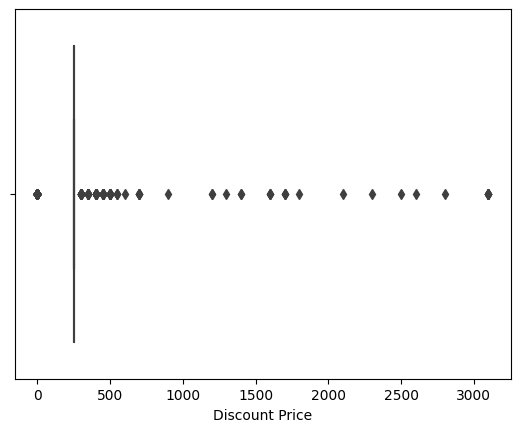

In [137]:
sns.boxplot(x='Discount Price', data=df)

<Axes: xlabel='Original Price'>

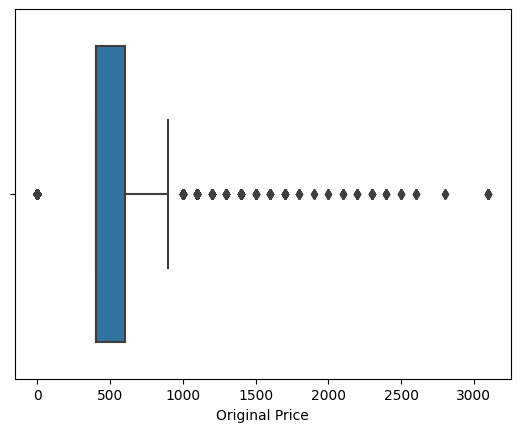

In [138]:
sns.boxplot(x='Original Price', data=df)

In [139]:
def count_outliers(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

In [140]:
df.isna().sum()

Name                0
Lecturer            0
Rating              0
Reviews             0
Hours               0
Lectures            0
Level               0
Original Price    222
Discount Price    222
dtype: int64

In [141]:
df.dropna(inplace=True)

<Axes: xlabel='Discount Price'>

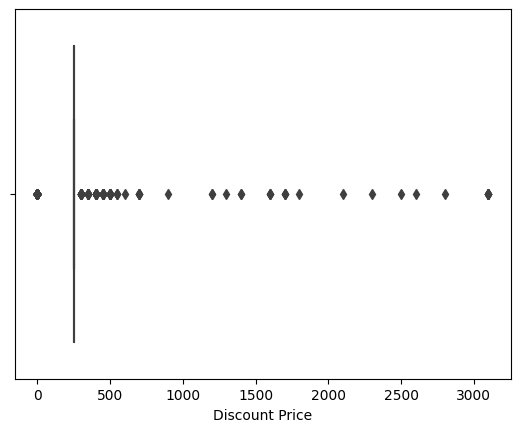

In [142]:
sns.boxplot(x='Discount Price', data=df)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 23 to 2758
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2137 non-null   object 
 1   Lecturer        2137 non-null   object 
 2   Rating          2137 non-null   float64
 3   Reviews         2137 non-null   float64
 4   Hours           2137 non-null   float64
 5   Lectures        2137 non-null   Int64  
 6   Level           2137 non-null   object 
 7   Original Price  2137 non-null   float64
 8   Discount Price  2137 non-null   float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 169.0+ KB


In [144]:
for col in df.select_dtypes(include=np.number).columns:
    print(col, count_outliers(col, df))

Rating 50
Reviews 331
Hours 205
Lectures 151
Original Price 439
Discount Price 288


In [145]:
def remove_outliers(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [146]:
df_dropped = df.copy()
for col in df.select_dtypes(include=np.number).columns:
    df_dropped = remove_outliers(col, df_dropped)

In [147]:
df_dropped.shape

(1105, 9)

In [148]:
for col in df_dropped.select_dtypes(include=np.number).columns:
    print(col, count_outliers(col, df_dropped))

Rating 0
Reviews 115
Hours 43
Lectures 22
Original Price 0
Discount Price 0


In [149]:
def handle_outliers(data, col):
    data[col] = np.log1p(data[col])
    return data

In [150]:
list(df_good.select_dtypes(include=np.number).columns)

['Rating', 'Reviews', 'Hours', 'Lectures', 'Original Price', 'Discount Price']

In [151]:
df_good.describe()

,Rating,Reviews,Hours,Lectures,Original Price,Discount Price
count,2137.000000,2137.000000,2137.000000,2137.0,2137.000000,2137.000000
mean,4.261675,1484.985494,9.565980,71.607861,544.759008,258.937763
std,0.448526,12505.556073,12.011566,83.977228,415.517874,232.706443
min,1.400000,1.000000,1.000000,4.0,0.000000,0.000000
25%,4.000000,24.000000,2.500000,24.0,400.000000,250.000000
50%,4.400000,83.000000,5.500000,46.0,400.000000,250.000000
75%,4.600000,371.000000,11.000000,87.0,600.000000,250.000000
max,5.000000,512887.000000,132.500000,795.0,3100.000000,3100.000000


In [152]:
for col in df_good.select_dtypes(include=np.number).columns:
    print(col, count_outliers(col, df_good))

Rating 50
Reviews 331
Hours 205
Lectures 151
Original Price 439
Discount Price 288


<Axes: xlabel='Lectures'>

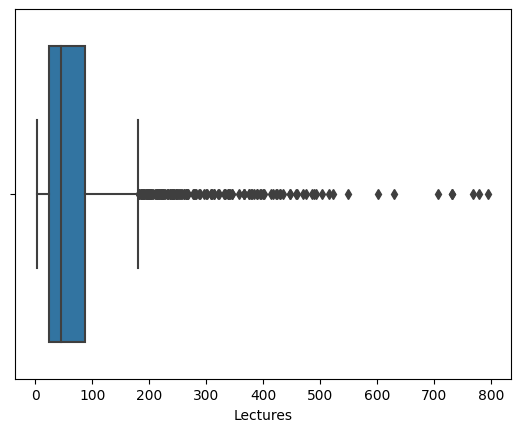

In [153]:
sns.boxplot(x='Lectures', data=df_good)

<Figure size 2000x2000 with 0 Axes>

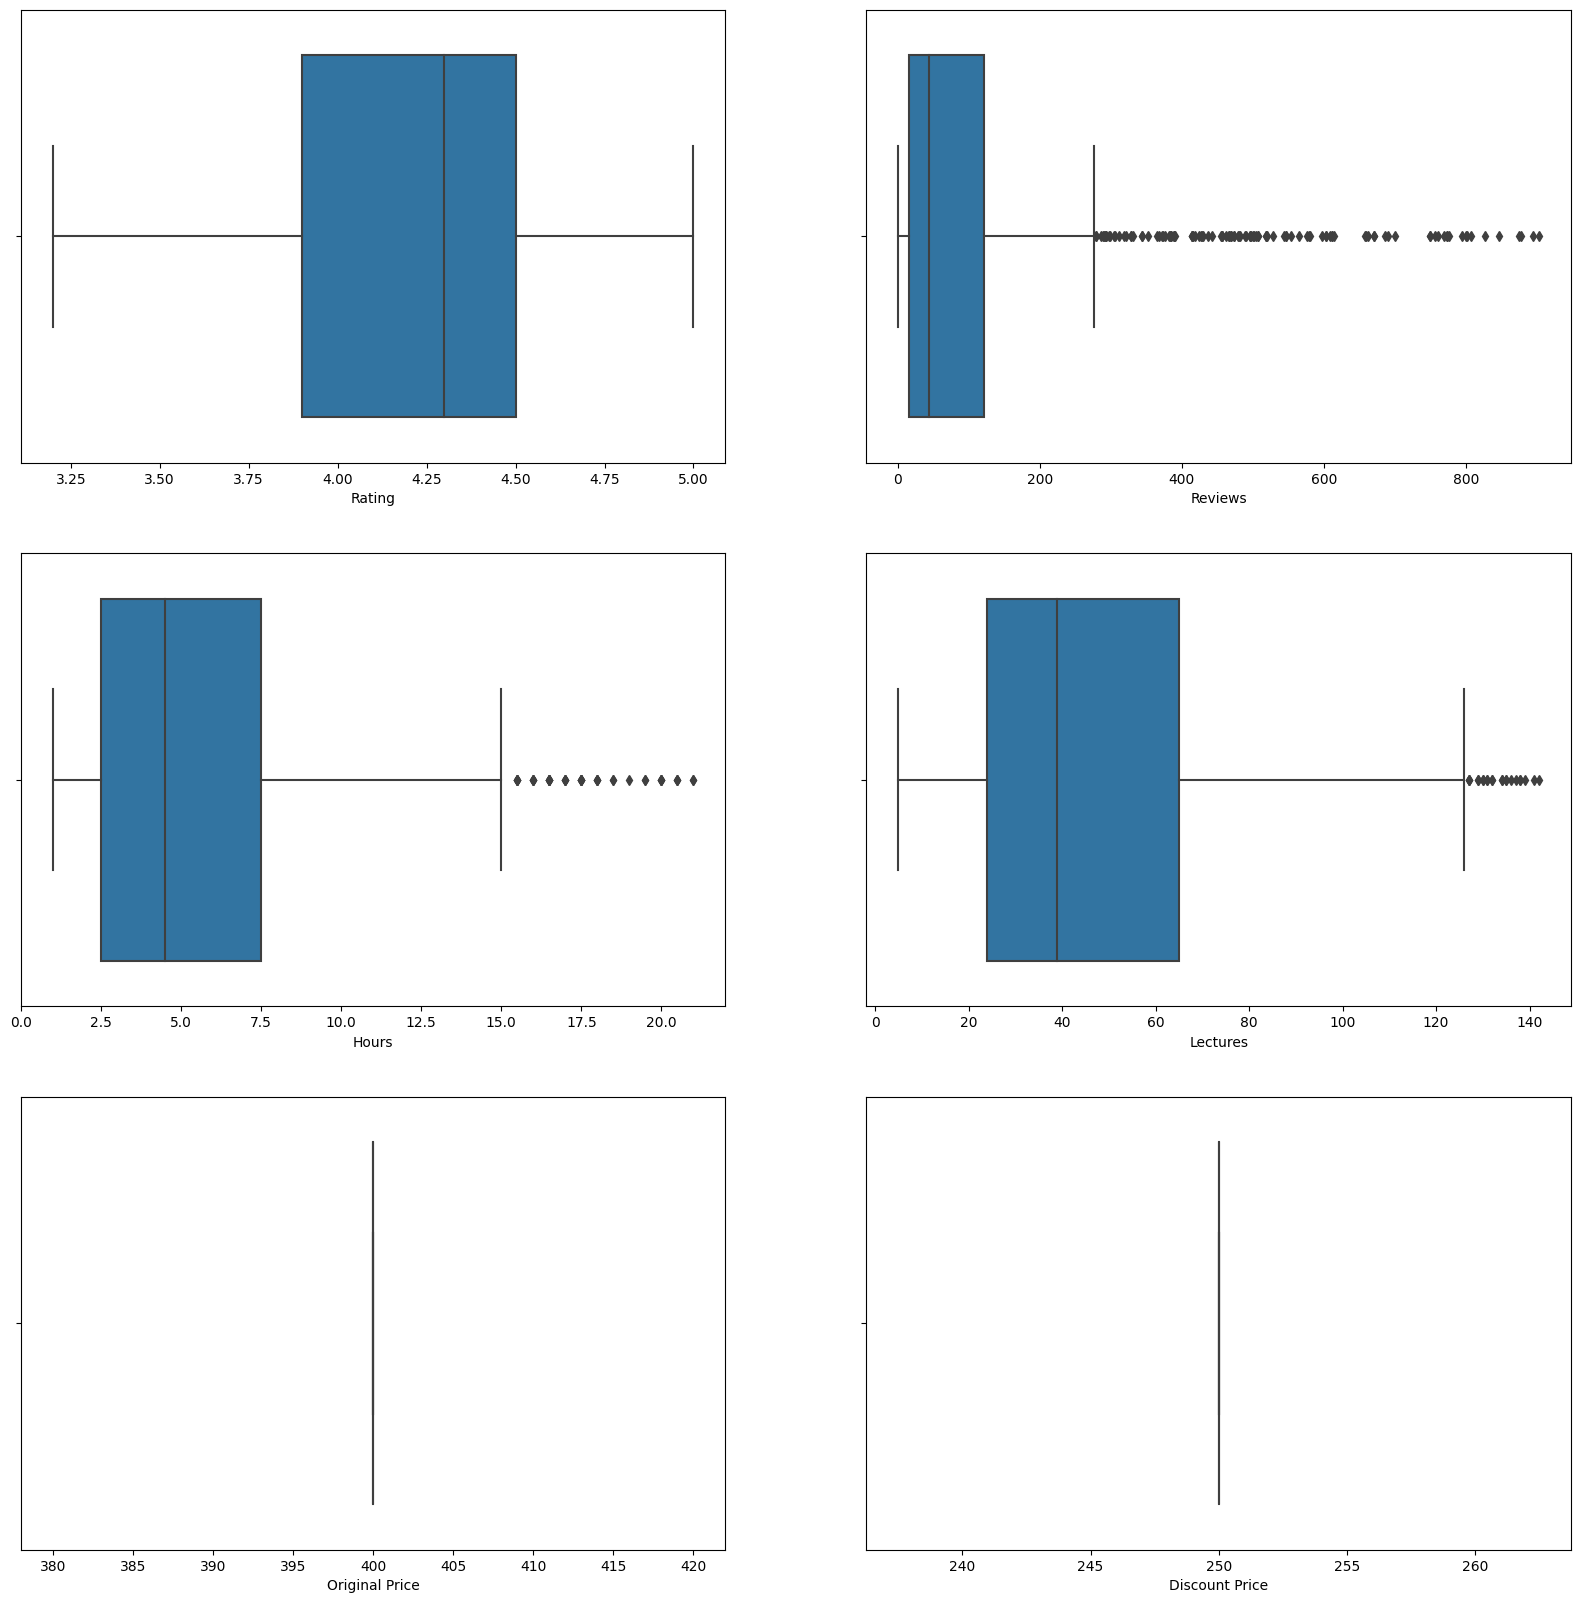

In [154]:
# let's create a subplot with boxplots for each numerical column
plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(df_dropped.select_dtypes(include=np.number).columns):
    sns.boxplot(x=col, data=df_dropped, ax=axes[i//2, i%2])

plt.show()

<Figure size 2000x2000 with 0 Axes>

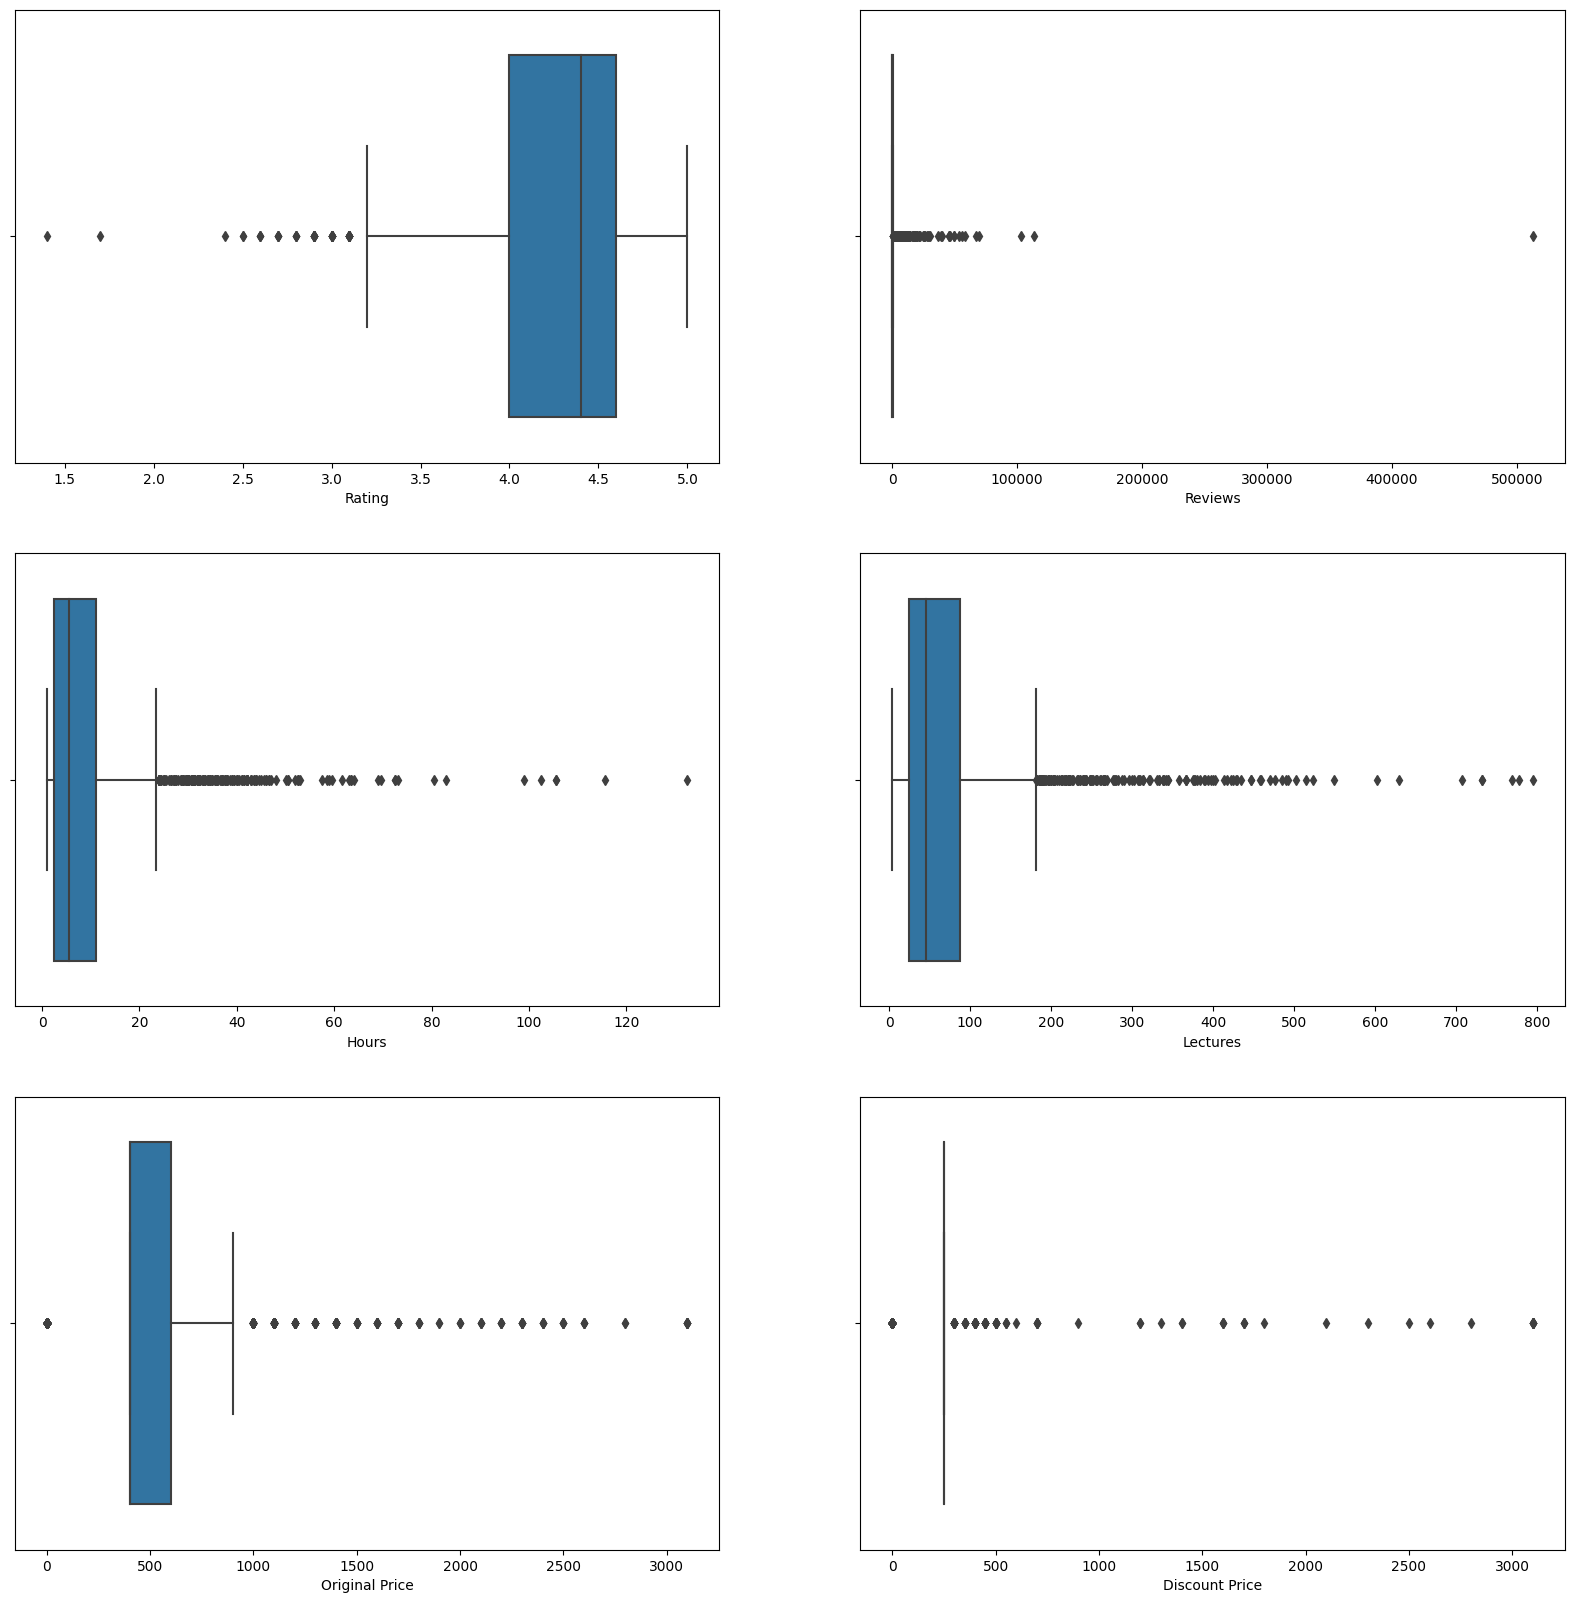

In [155]:
# let's create a subplot with boxplots for each numerical column
plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=col, data=df, ax=axes[i//2, i%2])

plt.show()

<Figure size 2000x2000 with 0 Axes>

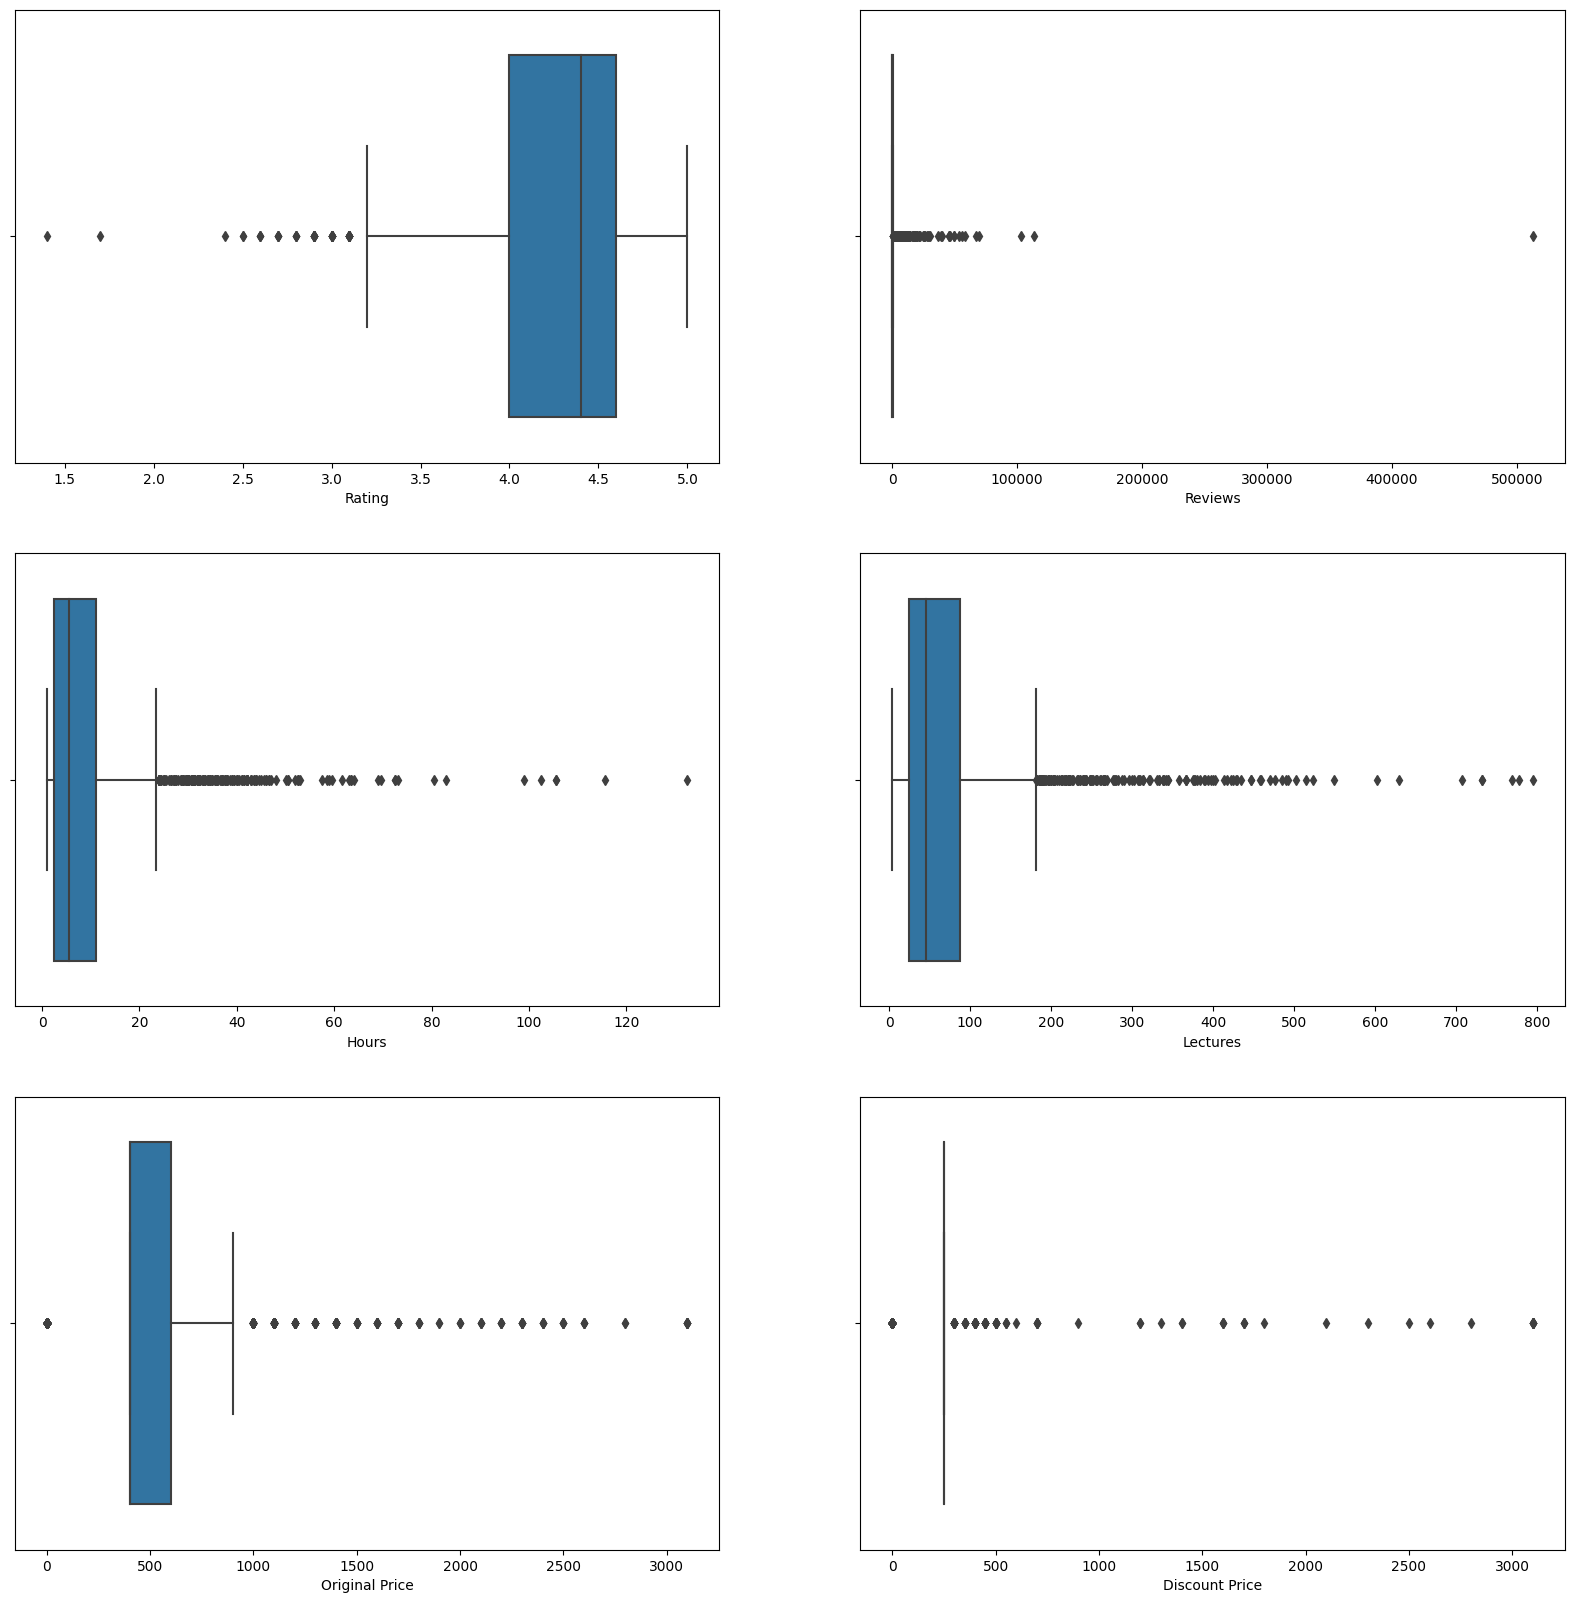

In [156]:
# let's create a subplot with boxplots for each numerical column
plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(df_good.select_dtypes(include=np.number).columns):
    sns.boxplot(x=col, data=df_good, ax=axes[i//2, i%2])

plt.show()

<Axes: xlabel='Reviews', ylabel='Density'>

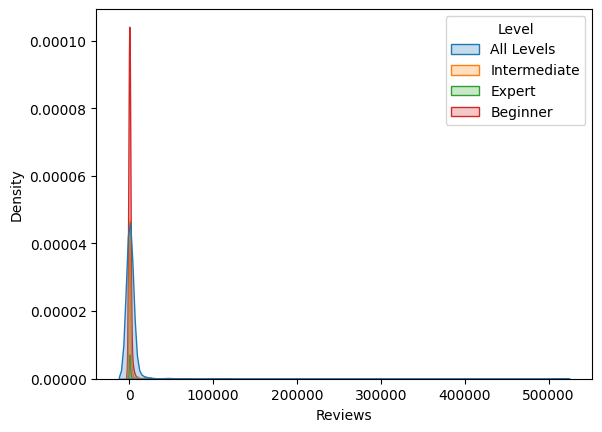

In [157]:
sns.kdeplot(data=df_good_2, x='Reviews', hue='Level', fill=True)

In [158]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061ea547bd93beKJ8RrPAMn2buyYkU" style="height: auto">\n    <hea…

In [159]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 23 to 2758
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2137 non-null   object 
 1   Lecturer        2137 non-null   object 
 2   Rating          2137 non-null   float64
 3   Reviews         2137 non-null   float64
 4   Hours           2137 non-null   float64
 5   Lectures        2137 non-null   Int64  
 6   Level           2137 non-null   object 
 7   Original Price  2137 non-null   float64
 8   Discount Price  2137 non-null   float64
dtypes: Int64(1), float64(5), object(3)
memory usage: 233.6+ KB


In [163]:
df_exploaded.dropna(inplace=True)

In [164]:
df_exploaded.isna().sum()

Name              0
Lecturer          0
Rating            0
Reviews           0
Hours             0
Lectures          0
Level             0
Original Price    0
Discount Price    0
dtype: int64